In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [38]:
Tc = 2/np.log(1+np.sqrt(2))
def reduce(t):
    return (t-Tc)/Tc

$C_V$

/tmp/ipykernel_33419/764479667.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-r" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(reduce(data_df.index),mean/temp**2,'-r', marker = ".", linestyle = "None")


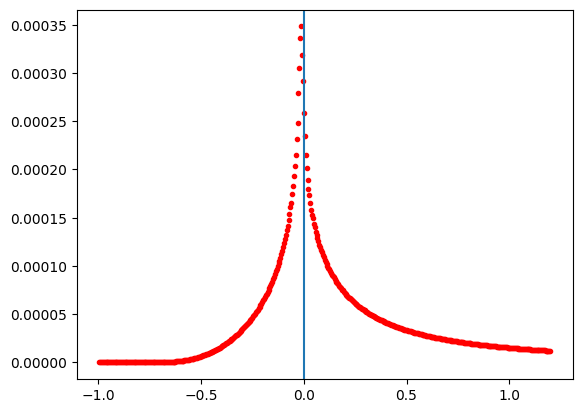

In [60]:
data_list = []
datapath = "./data/90"
for folder in Path(datapath).iterdir():
    for csv in folder.iterdir():
        if 'EM' in csv.name:
            df=pd.read_csv(csv,header=2,index_col=0)
            df=df[['E_std']]
            df=df.groupby(level=0).agg(list)["E_std"].apply(pd.Series)
            df=df.rename({'E_std':csv.name.replace('.csv','').split('_v')[1]},axis=1)
            data_list.append(df)

data_df=pd.concat(data_list, axis=1)

mean=data_df.mean(axis=1)**2
std=data_df.std(axis=1)*2*data_df.mean(axis = 1)
temp = np.abs(data_df.index)

#plt.errorbar(reduce(temp),mean/temp**2,yerr=std/np.sqrt(len(data_df.columns)),marker='.',color='r',linestyle='none')
plt.plot(reduce(data_df.index),mean/temp**2,'-r', marker = ".", linestyle = "None")
plt.axvline(0)
plt.show()

In [45]:
mean.idxmax()

2.24

Magnetization

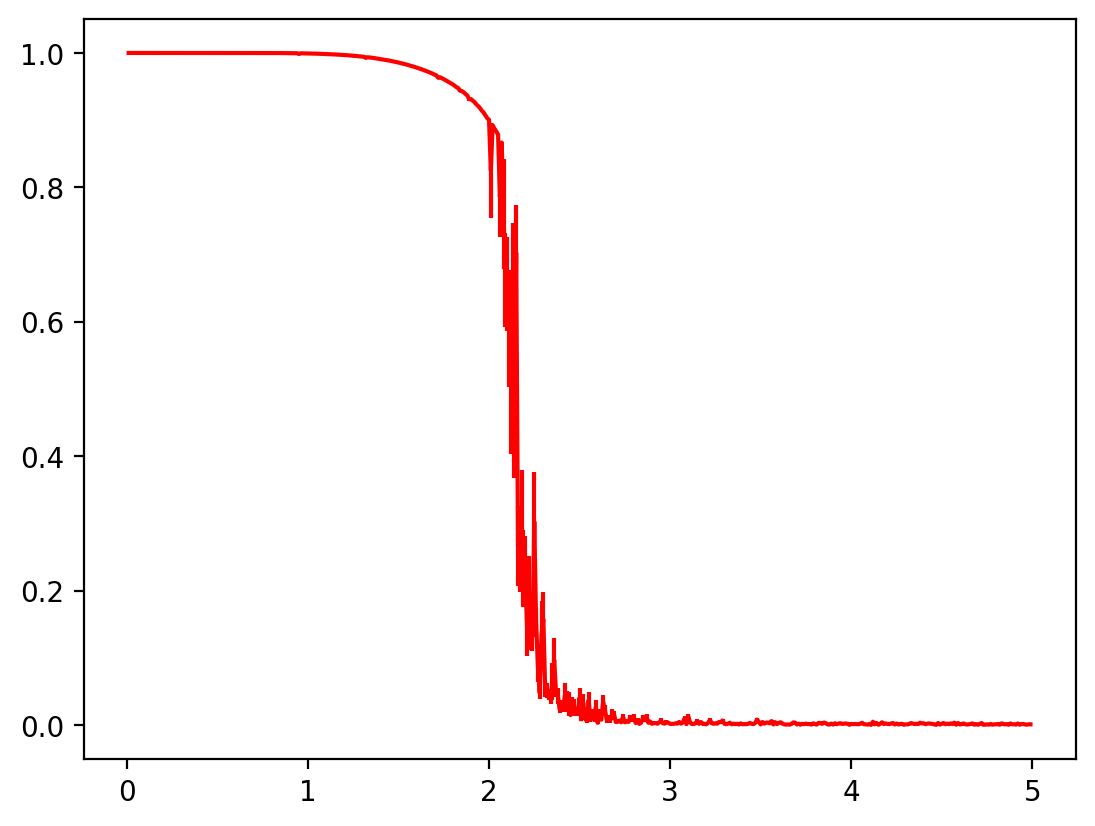

In [62]:
df_list=[]
for dir in os.listdir(os.getcwd()):
    if 'N20' not in dir or not os.path.isdir(os.path.join(os.getcwd(),dir)):
        continue
    datadir=os.path.join(os.getcwd(),dir)
    for file in os.listdir(datadir):
        if 'EM' in file:
            try:
                df=pd.read_csv(os.path.join(datadir,file),header=2,index_col=0)
                # print(df)
                df=abs(df[['M_mean']])
                df=df.groupby(level=0).agg(list)["M_mean"].apply(pd.Series)
                df=df.sort_index()
                df=df.rename({'M_mean':file.replace('.csv','').split('_v')[1]},axis=1)
                df_list.append(df)
                # df.plot(color='r',marker='.')
            except:
                pass
    data_df=pd.concat(df_list,axis=1)
plt.figure(dpi=200)
if len(data_df.columns)>1:
    mean=data_df.mean(axis=1)
    std=data_df.std(axis=1)
    plt.errorbar(data_df.index,mean,yerr=std/np.sqrt(len(data_df.columns)),marker='none',color='r',linestyle='-')
else:
    data_df.plot(color='r',marker='.')
plt.show()

# MONITORING PROGRESS ON GRACE

In [72]:
#USE THIS TO CHECK WHAT TEMPERATURE(S) NEED(S) TO BE RUN AGAIN.
# Automatically outputs a job_array that has only 36 temperature points, so each cpu runs ONE calculation.
# adjust time limit when generating sbatch files accordingly, or change the number of temperature points.
N_val=100
df_list=[]
for dir in os.listdir(os.getcwd()):
    if f'N{N_val}' not in dir or not os.path.isdir(os.path.join(os.getcwd(),dir)):
        continue
    print(dir)
    datadir=os.path.join(os.getcwd(),dir)
    for file in os.listdir(datadir):
        if 'EM' in file:
            try:
                df=pd.read_csv(os.path.join(datadir,file),header=2,index_col=0)
                # print(df)
                df=abs(df[['M_mean']])
                df=df.groupby(level=0).agg(list)["M_mean"].apply(pd.Series)
                df=df.sort_index()
                df=df.rename({'M_mean':file.replace('.csv','').split('_v')[1]},axis=1)
                df.index=np.round(df.index,3)
                df_list.append(df)
            except:
                pass
    data_df=pd.concat(df_list,axis=1)
curr_index=[round(elt,3) for elt in data_df.index]
expected_temps=set(i/100 for i in range(1,500))
rerun_temps=[]
for temp in expected_temps:
    if temp not in set(curr_index):
        rerun_temps+=[temp]*10
data_df['count']=data_df.count(axis=1)
def pop_rt(s):
    # print(s.__dir__())
    return[s.name]*int((10-s['count']))
    # return s.name
for val in data_df.apply(pop_rt,axis=1):
    rerun_temps+=val
rerun_file=f'N{N_val}_rerun_array.txt'
with open(rerun_file,'w') as fout:
    numlines=len(rerun_temps)//36+1
    for i in range(numlines-1):
        t_arr_str=','.join(str(e) for e in rerun_temps[i*36:(i+1)*36])
        fout.write(f'module load miniconda; conda activate qutip-env; ulimit -f 536870912; python3 ising_modified.py N:{N_val} n_steps:{N_val}00000 T_array:{t_arr_str}\n')
    t_arr_str=','.join(str(e) for e in rerun_temps[(numlines-1)*36:])
    fout.write(f'module load miniconda; conda activate qutip-env; ulimit -f 536870912; python3 ising_modified.py N:{N_val} n_steps:{N_val}00000 T_array:{t_arr_str}\n')
rerun_temps
# rerun_temps
# plt.figure(dpi=200)
# if len(data_df.columns)>1:
#     mean=data_df.mean(axis=1)
#     std=data_df.std(axis=1)
#     plt.errorbar(data_df.index,mean,yerr=std/np.sqrt(len(data_df.columns)),marker='.',color='r',linestyle='none')
# else:
#     data_df.plot(color='r',marker='.')
# plt.show()

data_N100_20230410-102926
data_N100_20230410-102944
data_N100_20230411-102448841865
data_N100_20230410-102932
data_N100_20230411-102518039353
data_N100_20230411-102910660763
data_N100_20230411-102729332577
data_N100_20230410-102947
data_N100_20230411-102854251742
data_N100_20230410-102925
data_N100_20230411-102229801279
data_N100_20230410-102939
data_N100_20230410-102936


[0.05,
 0.05,
 0.06,
 0.06,
 0.07,
 0.08,
 0.09,
 0.09,
 0.1,
 0.1,
 0.1,
 0.1,
 0.11,
 0.11,
 0.11,
 0.11,
 0.12,
 0.12,
 0.13,
 0.14,
 0.14,
 0.15,
 0.15,
 0.15,
 0.16,
 0.16,
 0.17,
 0.17,
 0.17,
 0.17,
 0.18,
 0.19,
 0.19,
 0.2,
 0.2,
 0.21,
 0.22,
 0.22,
 0.23,
 0.24,
 0.25,
 0.25,
 0.26,
 0.26,
 0.27,
 0.27,
 0.27,
 0.27,
 0.28,
 0.28,
 0.29,
 0.3,
 0.3,
 0.31,
 0.32,
 0.33,
 0.33,
 0.33,
 0.34,
 0.34,
 0.35,
 0.36,
 0.36,
 0.36,
 0.37,
 0.38,
 0.39,
 0.39,
 0.4,
 0.4,
 0.41,
 0.41,
 0.42,
 0.43,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.12,
 

In [13]:
N_list=[10*i for i in range(1,11)]
reps=10
for n in N_list:
    fout=open(f'{n}_job_array.txt','w')
    for _ in range(reps):
        fout.write(f'module load miniconda; conda activate qutip-env; ulimit -f 536870912; python3 ising_modified.py N:{n} n_steps:{100000*n}\n')
    fout.close()